# NYC Crime EDA and introduction
- In this script I look at the data gathered for the introduction part of this project and do a little exploratory analysis.

In [7]:
# import libraries and functions
import sys

path_to_functions = 'C:/Users/Zaca/Documents/GitHub/useful-functions/'
sys.path.append(path_to_functions)

from plotting import default_plot
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import geopandas
import geoplot
from shapely.geometry import Polygon, Point
import geoplot.crs as gcrs
from sklearn.preprocessing import StandardScaler
import numpy as np

path = 'C:/Users/Zaca/Documents/Datasets/nyc/'

# matplotlib params

In [8]:
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['font.sans-serif'] = "Arial"   
mpl.rcParams['font.size'] = 15
mpl.rcParams['axes.linewidth'] = 0.5
mpl.rcParams['xtick.major.width'] = 0.5
mpl.rcParams['ytick.major.width'] = 0.5   

# Making introductory plots

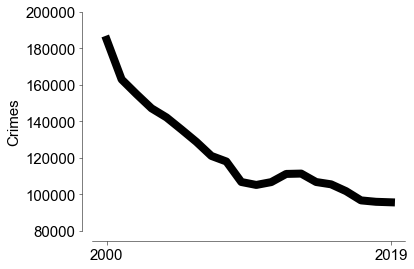

In [9]:
# data for crime rates in NYC between 2000 and 2019.
crime_rate = [184652, 
              162908, 
              154809, 
              147069, 
              142093, 
              135475, 
              128682, 
              121009, 
              117956, 
              106730, 
              105115, 
              106669, 
              111147, 
              111335, 
              106722, 
              105453, 
              101716, 
              96658, 
              95883, 
              95606]

fig, ax = plt.subplots(figsize=(6, 4))
ax = default_plot(ax, ['left', 'bottom'])
plt.plot(range(len(crime_rate)), crime_rate, lw=8, color='k')
plt.ylim(80000, 200000)
plt.xticks([0, 19], [2000, 2019])
plt.tight_layout()
plt.ylabel('Crimes')
plt.tight_layout()
#plt.savefig('figures/nypd_crime_rates.png')

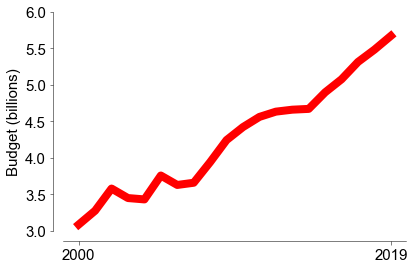

In [10]:
# data for NYPD budget between 2000 and 2019.
budget = [5668823,
          5480432,
          5312163,
          5075081,
          4896335,
          4669342,
          4658350,
          4631506,
          4559496,
          4420306,
          4242508,
          3940064,
          3657778,
          3627798,
          3756724,
          3429797,
          3448353,
          3578458,
          3275052,
          3085518]

# make the plot
fig, ax = plt.subplots(figsize=(6, 4))
ax = default_plot(ax, ['left', 'bottom'])
plt.plot(range(len(budget)), [x/1000000 for x in list(reversed(budget))], lw=8, color='r')
plt.ylim(3, 6)
plt.xticks([0, 19], [2000, 2019])
plt.tight_layout()
plt.ylabel('Budget (billions)')
plt.tight_layout()
#plt.savefig('figures/nypd_budget.png')

# Complaints dataset

In [ ]:
# open data
crime = pd.read_csv(path + 'nypd_historic_07-18.csv', index_col=0)
# transform to datetime
crime['date'] = pd.to_datetime(crime['date'])

## Top 20 Crimes

In [ ]:
crime.description.value_counts()[:20]

## Top 20 Premises

In [ ]:
crime.premises.value_counts()[:20]

In [ ]:
robb = pd.read_csv('robbery.csv', index_col=0)
burg = pd.read_csv('burglary.csv', index_col=0)

In [ ]:
clustering = burg[burg.precinct == 75]['perc']
random = burg[burg.precinct == 75]['random_perc']

In [ ]:
burglary_final = burg.groupby('date').agg('sum')
burglary_final['perc'] = burglary_final['prediction']/burglary_final['observed']*100
burglary_final['random_perc'] = burglary_final['random_prediction']/burglary_final['observed']*100

In [ ]:
burglary_final['perc'].mean()

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
ax = default_plot(ax, ['left', 'bottom'])
plt.plot(range(24), burglary_final['perc'], lw=5, color='r', label='Algorithm')
plt.plot(range(24), burglary_final['random_perc'], lw=5, color='k', label='Random')
plt.ylim(0, 100)
plt.xticks([6, 18], ['2017', '2018'])
plt.legend(frameon=False, bbox_to_anchor=(1, 1.1))
plt.ylabel('Accuracy (%)')
plt.tight_layout()
plt.savefig('figures/burglary_final.png')

In [ ]:
robbery_final = robb.groupby('date').agg('sum')
robbery_final['perc'] = robbery_final['prediction']/robbery_final['observed']*100
robbery_final['random_perc'] = robbery_final['random_prediction']/robbery_final['observed']*100

In [ ]:
burglary_final['prediction'].sum()/burglary_final['observed'].sum()

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
ax = default_plot(ax, ['left', 'bottom'])
plt.plot(range(24), robbery_final['perc'], lw=5, color='r', label='Algorithm')
plt.plot(range(24), robbery_final['random_perc'], lw=5, color='k', label='Random')
plt.ylim(0, 100)
plt.xticks([6, 18], ['2017', '2018'])
plt.tight_layout()
plt.legend(frameon=False, bbox_to_anchor=(1, 1.1))
plt.ylabel('Accuracy (%)')
plt.tight_layout()
plt.savefig('figures/robbery_final.png')